
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [438]:
iris = sns.load_dataset('iris') #skapar en dataframe av iris datasetet
print(f'Keys: {iris.keys()}') #0a

Keys: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


#### EDA:

In [439]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [440]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Intressant dataanalys nedan:
- skapar ett objekt 'iris_setosa_describe' som innehåller datan som man får från describe, men endast för setosa.
- baserat på detta objektet kan man komma åt kvantifierad data.
- man kan använda datan för att tex ta bort värden större än eller mindre än, ett visst värde.

In [441]:
iris_describe_setosa = iris[iris['species']=='setosa'].describe()
iris_describe_setosa.describe()
iris_describe_setosa.quantile(q=0.25)

sepal_length    4.675000
sepal_width     2.975000
petal_length    1.300000
petal_width     0.176346
Name: 0.25, dtype: float64

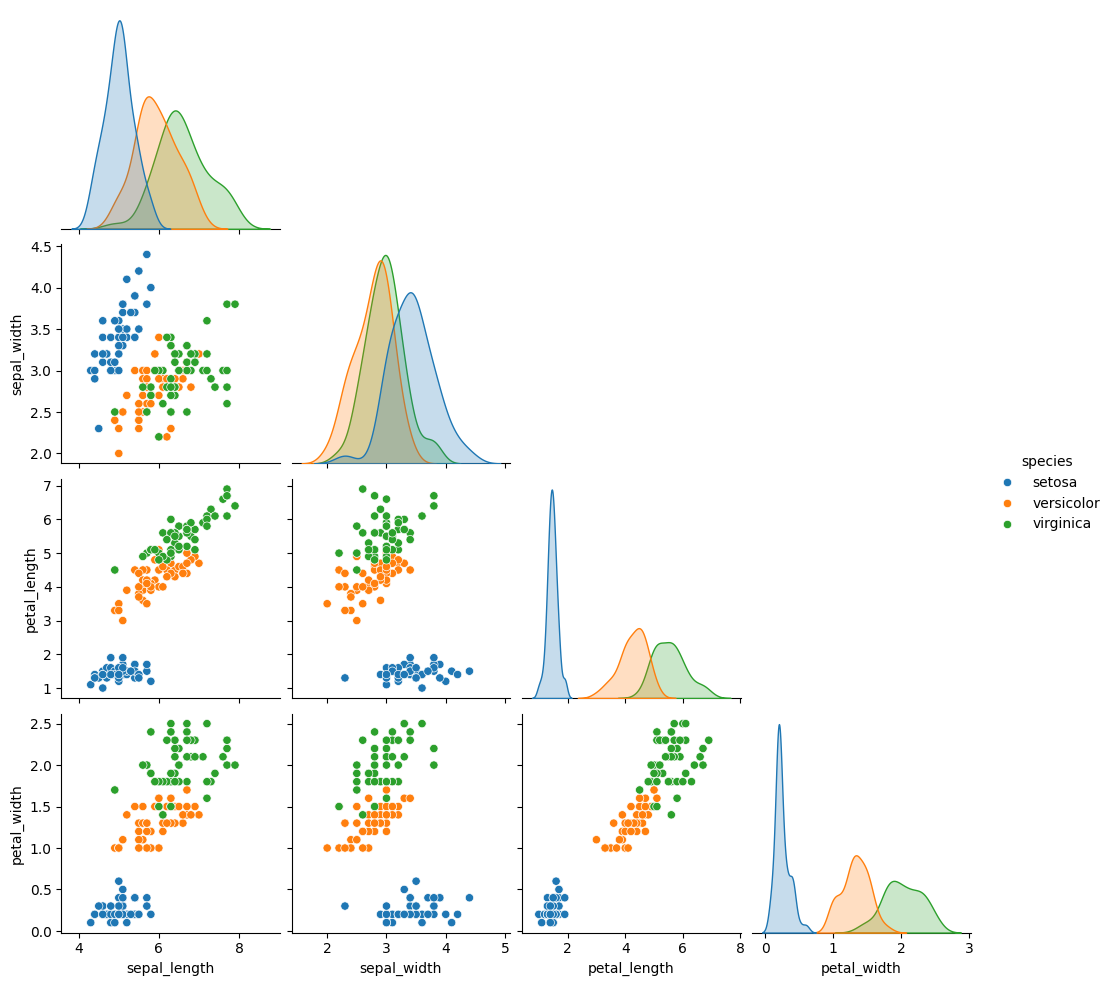

In [442]:
sns.pairplot(data=iris, hue='species', corner=True)

In [443]:
iris_onehot = pd.get_dummies(iris, columns=['species'], dtype=int)
iris_onehot

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


<Axes: >

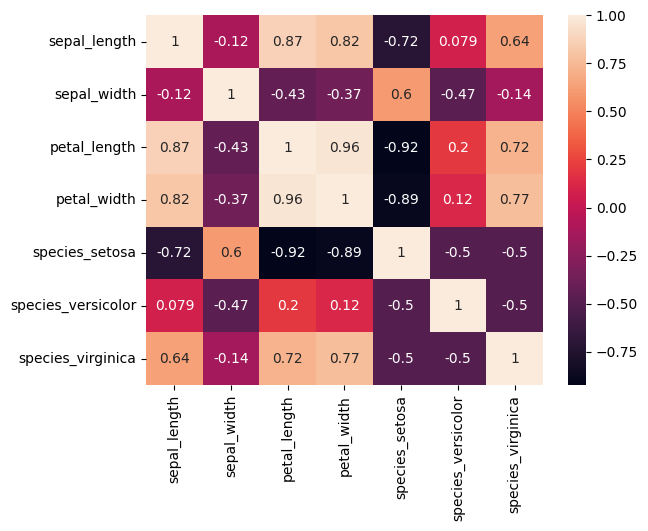

In [444]:
iris_corr = iris_onehot.corr()
sns.heatmap(data=iris_corr, annot=True)

<Axes: xlabel='species', ylabel='petal_width'>

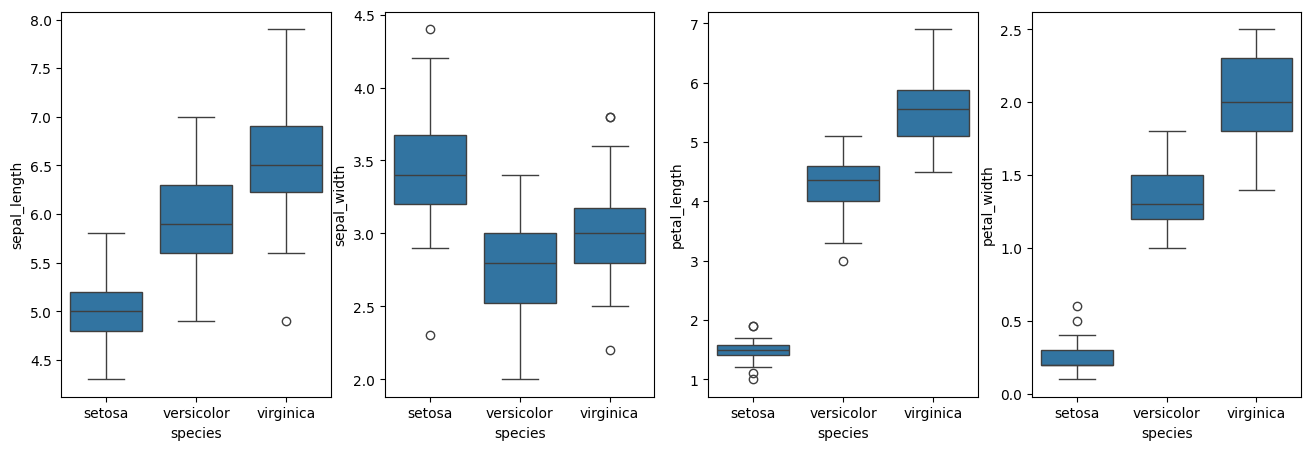

In [445]:
fig, axes = plt.subplots(1,4, figsize=(16, 5))
sns.boxplot(data=iris,x='species', y='sepal_length', ax=axes[0])
sns.boxplot(data=iris, x='species', y='sepal_width', ax=axes[1] )
sns.boxplot(data=iris, x='species', y='petal_length', ax=axes[2])
sns.boxplot(data=iris, x='species', y='petal_width', ax=axes[3])

Removing outliers:

iris.columns
iris['species'].unique().tolist()
#iris[iris['species'].unique()]

for specie in iris['species'].unique().tolist():
    df_filtered = iris[iris['species'] == specie] # filterar så vi får en dataframe som innehåller endast en specie av iris
    for item in df_filtered.keys():
        
    

for specie in iris['species'].unique().tolist():
    for item in iris[iris['species'] == specie].keys():
        lower = float(iris[iris['species'] == specie][item].quantile(0.25) - (iris[iris['species'] == specie][item].quantile(0.75) - iris[iris['species'] == specie][item].quantile(0.25)) * 1.5)
        upper = iris[iris['species'] == specie][item].quantile(0.75) + (iris[iris['species'] == specie][item].quantile(0.75) - iris[iris['species'] == specie][item].quantile(0.25)) * 1.5
        print(lower, upper)
        

## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 

---

In [446]:
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
iris.sample(10)

C:\Users\danie\AppData\Local\Temp\ipykernel_2932\3449926792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})


,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,0
65,6.7,3.1,4.4,1.4,1
140,6.7,3.1,5.6,2.4,2
12,4.8,3.0,1.4,0.1,0
51,6.4,3.2,4.5,1.5,1
17,5.1,3.5,1.4,0.3,0
33,5.5,4.2,1.4,0.2,0
125,7.2,3.2,6.0,1.8,2
22,4.6,3.6,1.0,0.2,0
92,5.8,2.6,4.0,1.2,1


In [447]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#dela upp i X, y
#X, y = iris_onehot.drop(columns=['species_setosa','species_virginica','species_versicolor']), iris_onehot.drop(columns=['sepal_length','sepal_width','petal_length','petal_width'])
X, y = iris.drop(columns=['species']), iris.drop(columns=['sepal_length','sepal_width','petal_length','petal_width'])

# split datan i train och test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# standardisera X datan
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [448]:
# gör om y-värdena till numpy arrays, eftersom scaled_X är numpy arrays.
y_train = np.array(y_train)
y_test = np.array(y_test)

## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [449]:
from sklearn.linear_model import LogisticRegressionCV

#model = LogisticRegressionCV(penalty = 'elasticnet', multi_class='multinomial', solver='saga', l1_ratios=[.01, .1, .25, .5, .75, .9, .95, .99])
model = LogisticRegressionCV(penalty = 'l2', multi_class='multinomial', solver='lbfgs')
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_

c:\Users\danie\.virtualenvs\Machine_Learning_Daniel_Claesson-bhjbabyT\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[-0.70836399,  0.72838673, -1.18175659, -1.09126765],
        [ 0.25988056, -0.41414751, -0.01776215, -0.414214  ],
        [ 0.44848343, -0.31423923,  1.19951873,  1.50548165]]),
 array([-0.46016664,  1.17890528, -0.71873864]))

In [450]:
y_hat = model.predict(scaled_X_test)

In [451]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96


## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 

<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

In [452]:
# 3a, manuell check de 10 första samples
y_hat_df = pd.DataFrame(y_hat)
y_test_df = pd.DataFrame(y_test)
print(y_hat_df.head(10))
print(y_test_df.head(10))

   0
0  1
1  0
2  2
3  1
4  1
5  0
6  1
7  2
8  1
9  1
   0
0  1
1  0
2  2
3  1
4  1
5  0
6  1
7  2
8  1
9  1


In [453]:
y_test_df

,0
0,1
1,0
2,2
3,1
4,1
5,0
6,1
7,2
8,1
9,1


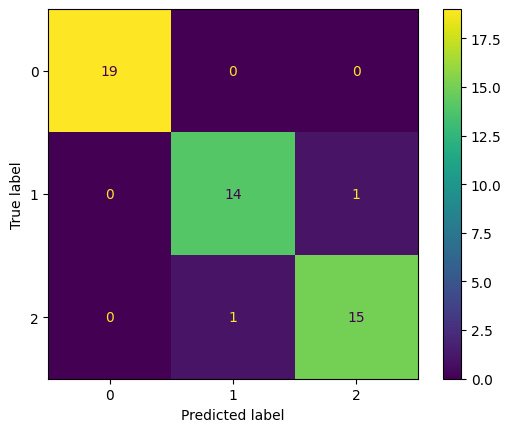

In [454]:
# 3b, confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

confusion_matris = confusion_matrix(y_test, y_hat)
display = ConfusionMatrixDisplay(confusion_matris)

display.plot()

In [455]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [459]:
sum_df = pd.DataFrame()
sum_df = X_test
sum_df.reset_index(inplace=True)
#sum_df.drop(columns='Level_0')
#sum_df['species'] = y_test
#sum_df['prediction'] = y_hat_df
sum_df['correct_prediction'] = (y_test_df == y_hat_df).astype(int)
sum_df.head(5)


,level_0,index,sepal_length,sepal_width,petal_length,petal_width,correct_prediction
0,0,73,6.1,2.8,4.7,1.2,1
1,1,18,5.7,3.8,1.7,0.3,1
2,2,118,7.7,2.6,6.9,2.3,1
3,3,78,6.0,2.9,4.5,1.5,1
4,4,76,6.8,2.8,4.8,1.4,1


In [460]:
sum_df.drop(columns=['level_0','index'])

,sepal_length,sepal_width,petal_length,petal_width,correct_prediction
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,1
2,7.7,2.6,6.9,2.3,1
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
5,5.4,3.4,1.5,0.4,1
6,5.6,2.9,3.6,1.3,1
7,6.9,3.1,5.1,2.3,1
8,6.2,2.2,4.5,1.5,1
9,5.8,2.7,3.9,1.2,1


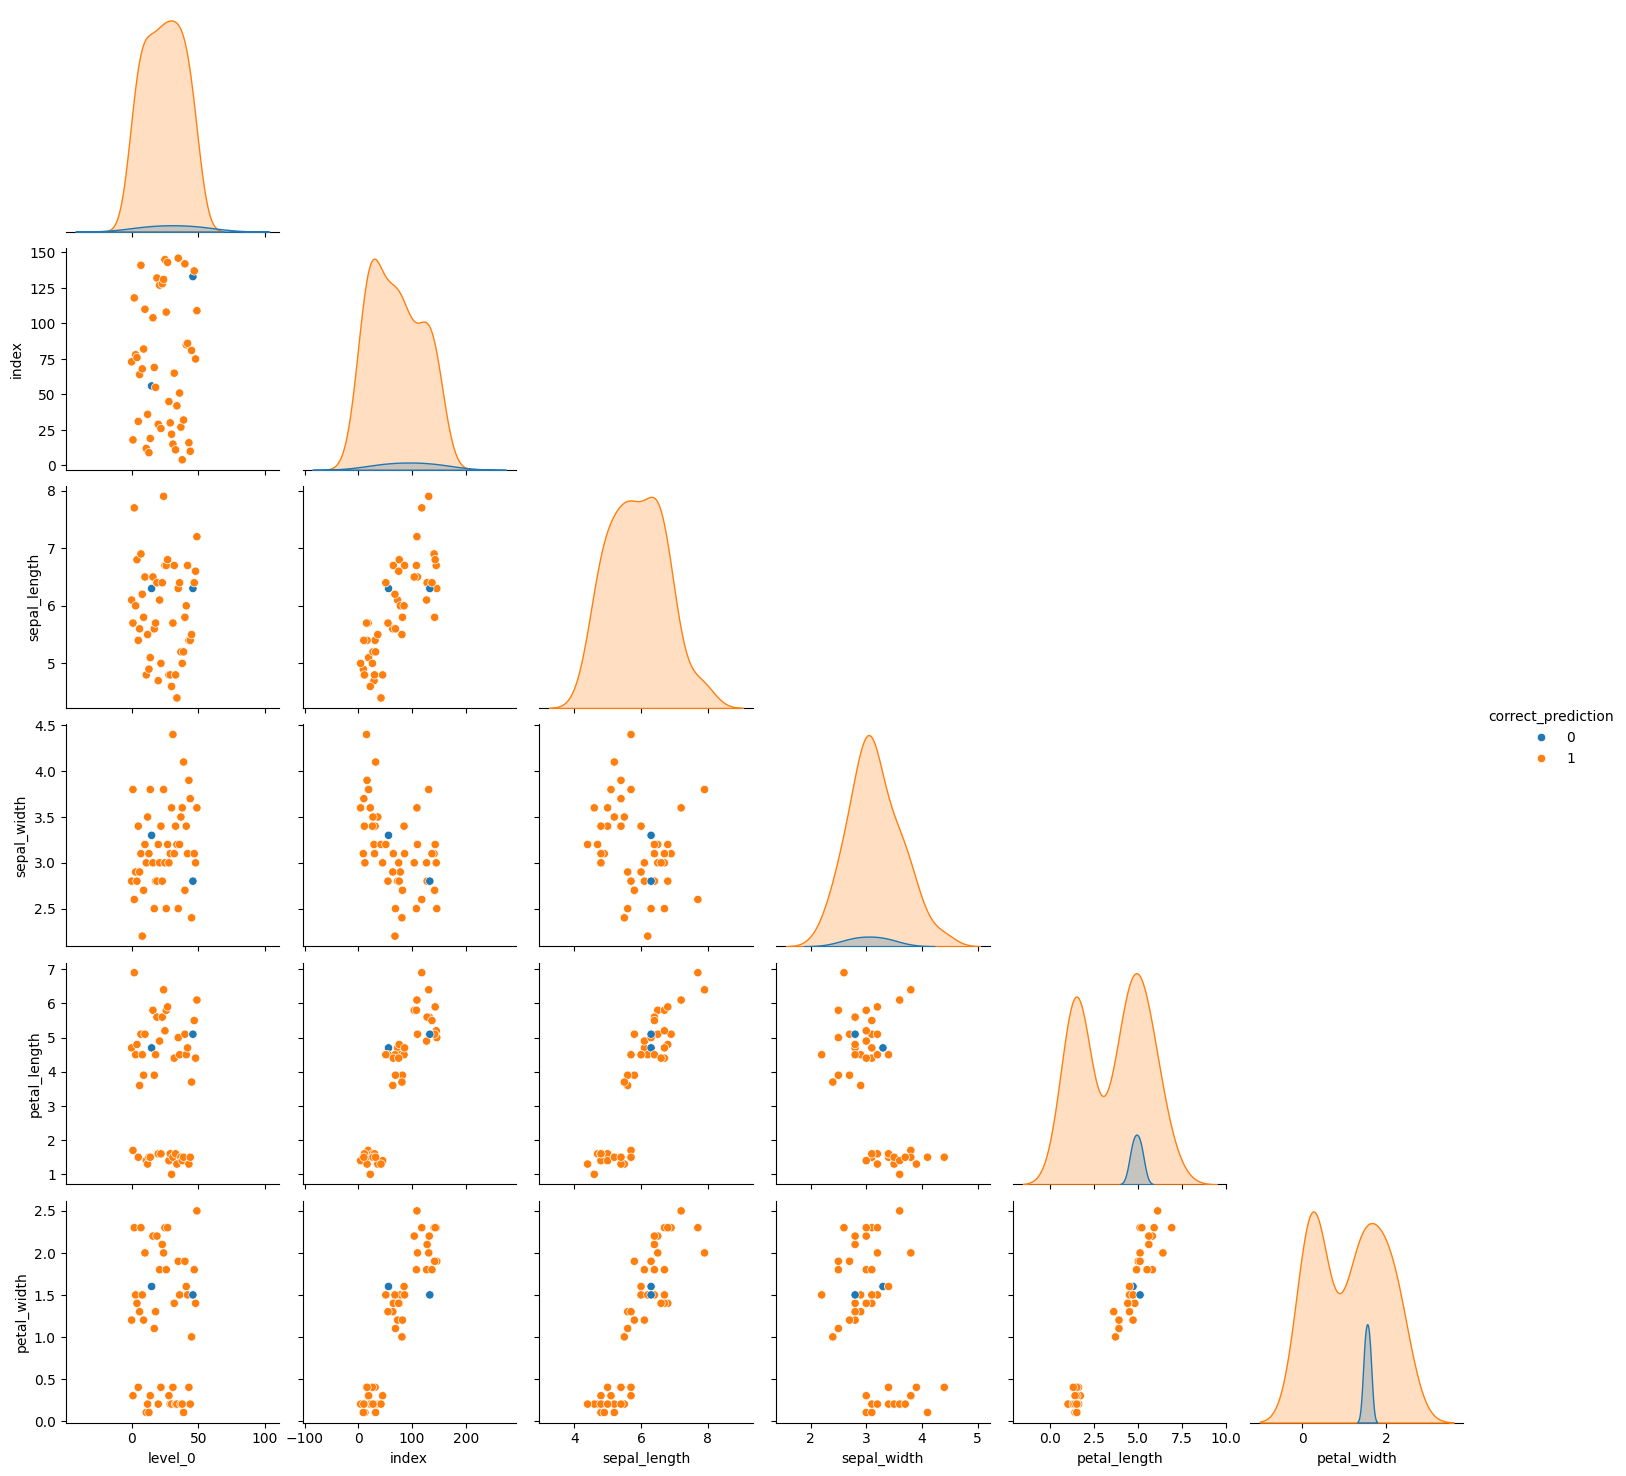

In [461]:
sns.pairplot(data=sum_df, hue='correct_prediction', corner=True)

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---